In [25]:
import json
import numpy as np
import sys
import matplotlib.pyplot as plt
import random
import math

from src.each_color import EachColor
from src.generic_algorithm import genetic_algorithm

In [26]:
def read_file():
    f = open('./config.json')
    return json.load(f)
     

def set_data_from_file(conf_file):
    return conf_file['colors_palette'], conf_file['selection_algorithm'], conf_file['mutation_rate'], conf_file['max_generations'], conf_file['expected_fitness'], conf_file['population_number'], conf_file['fitness_cut']

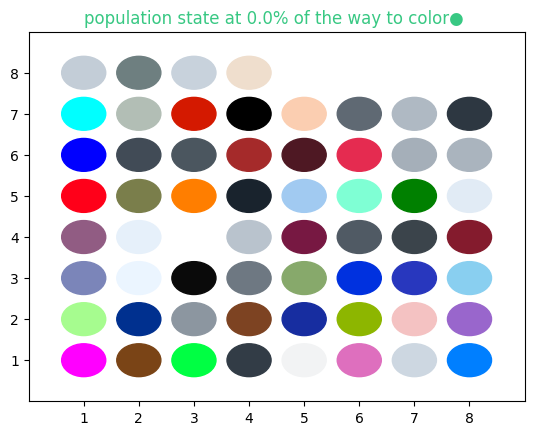

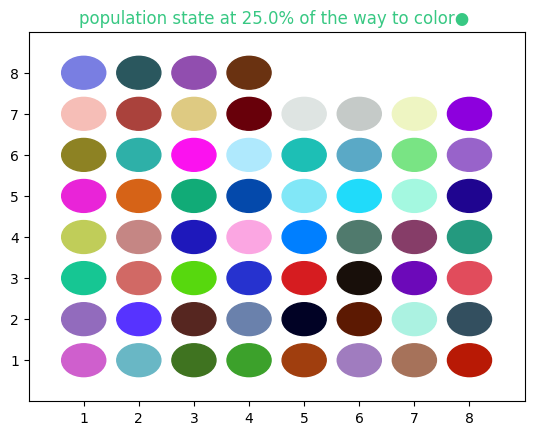

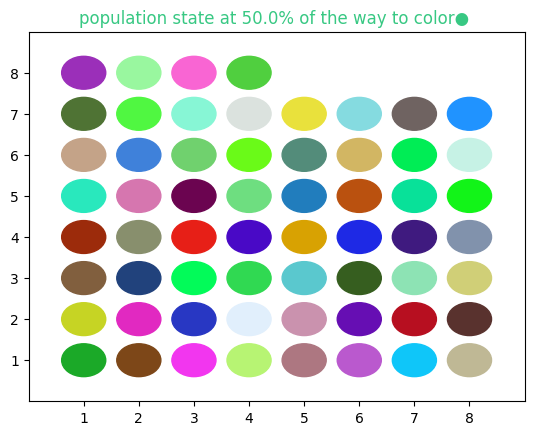

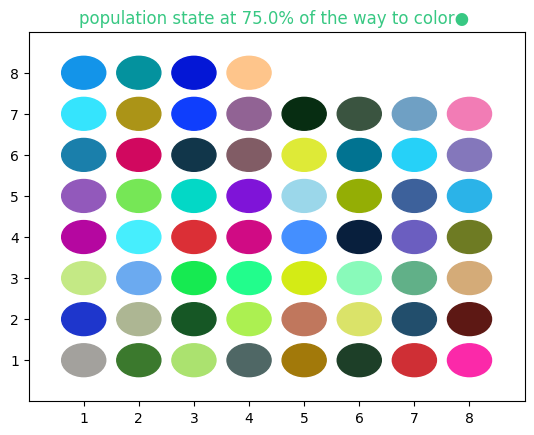

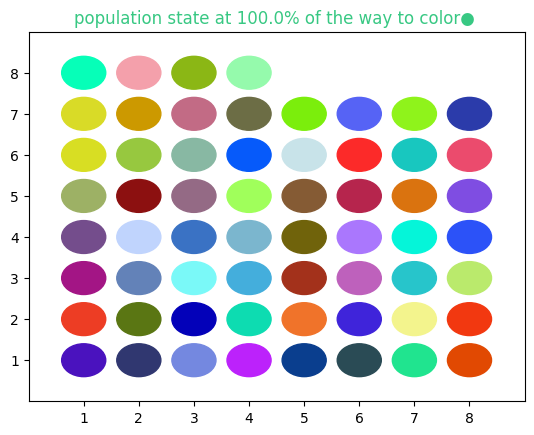

Encontrado en la generacion numero: 6
Encontrado en la generacion numero: 1
Encontrado en la generacion numero: 9
Encontrado en la generacion numero: 1
Encontrado en la generacion numero: 0
Encontrado en la generacion numero: 30
Encontrado en la generacion numero: 12
Encontrado en la generacion numero: 22
Encontrado en la generacion numero: 29
Encontrado en la generacion numero: 6
Encontrado en la generacion numero: 24
Encontrado en la generacion numero: 15
Encontrado en la generacion numero: 4
Encontrado en la generacion numero: 22
Encontrado en la generacion numero: 4
Encontrado en la generacion numero: 21
Encontrado en la generacion numero: 4
Encontrado en la generacion numero: 5
Encontrado en la generacion numero: 1
Encontrado en la generacion numero: 13
Encontrado en la generacion numero: 3
Encontrado en la generacion numero: 0
Encontrado en la generacion numero: 2
Encontrado en la generacion numero: 1
Encontrado en la generacion numero: 0
Encontrado en la generacion numero: 2
Enc

KeyboardInterrupt: 

In [27]:
if __name__ == "__main__":
    colors_from_palette = []
    target_color : EachColor
    alg_names=["elite","roulette","rank","probabilistic_tournament"]
    conf_file = read_file()
    colors_palette, selection_algorithm, mutation_rate, max_generations, expected_fitness, population_number, fitness_cut = set_data_from_file(conf_file)

    with open(colors_palette, 'r') as file:
        first_line_is_target_color = file.readline()

        red, green, blue = first_line_is_target_color.split()
        target_color = EachColor(int(red), int(green), int(blue),mutation_rate)

        n = population_number
        random_lines = random.sample(file.readlines(), n)

        for line in random_lines :
            red, green, blue = line.split()
            current_color = EachColor(int(red), int(green), int(blue),mutation_rate)
            colors_from_palette.append(current_color)
    file.close()

    # TODO: Este grafico no anda bien
    # Run the genetic algorithm for one time and store the results
    result, fitness_by_generation,populations = genetic_algorithm(colors_from_palette, target_color,"probabilistic_tournament" , mutation_rate, 10, expected_fitness, population_number,False)

    #plot 5 generations
    graph_populations=[]
    if len(populations) <= 5:
    # If the array has 5 or fewer elements, pass all elements
        for population in populations:
            graph_populations.append(population)
    else:
        for i in range(5):
            graph_populations.append(populations[math.floor(i * len(populations) / 5)])
    index=0
    for population in graph_populations:
        num_colors = len(population)
        num_cols = int(np.ceil(np.sqrt(num_colors)))
        num_rows = int(np.ceil(num_colors / num_cols))
        circle = plt.Circle((0.1, 0.5), radius=0.1, color=target_color.color)

        # Create a figure and axis object
        fig, ax = plt.subplots()

        # Plot the circles
        for i in range(num_colors):
            x = i % num_cols
            y = i // num_cols
            color = population[i]
            ax.add_patch(plt.Circle((x, y), radius=0.4, color=color.color ))

        # Set the axis limits and tick labels
        ax.set_xlim([-1, num_cols])
        ax.set_ylim([-1, num_rows])
        ax.set_xticks(range(num_cols))
        ax.set_yticks(range(num_rows))
        ax.set_xticklabels(range(1, num_cols+1))
        ax.set_yticklabels(range(1, num_rows+1))
        title = ax.set_title('population state at ' + str((100/(len(graph_populations)-1))*index)+'% of the way to color'+ '\u25cf ')
        index=index+1
        title.set_color(target_color.color)


        # Add a title and show the plot
        plt.show()


    #tests by changing json parameters
    fitnesses_mean=[]
    fitnesses_std=[]
    
    for x in range(5):
        results=[]
        for i in range(100):
            fitness=[]
            max,fitness,population=genetic_algorithm(colors_from_palette, target_color, selection_algorithm, mutation_rate, max_generations, expected_fitness, 20+20*x,fitness_cut)
            results.append(len(fitness))
        fitnesses_mean.append(np.mean(results))
        fitnesses_std.append(np.std(results) / np.sqrt(len(results)))
        

    plt.bar([1,2,3,4,5], fitnesses_mean,yerr=fitnesses_std)
    plt.xticks([1,2,3,4,5], [20,40,60,80,100])
    plt.ylabel('generaciones')
    plt.title('Promedio de generaciones con distintas cantidades de colores')
    plt.legend()
    plt.show()

    fitnesses_mean=[]
    fitnesses_std=[]
    
    for x in range(5):
        results=[]
        for i in range(100):
            fitness=[]
            max,fitness,population=genetic_algorithm(colors_from_palette, target_color, selection_algorithm, mutation_rate, max_generations, 0.90+0.02*x, population_number,fitness_cut)
            results.append(len(fitness))
        fitnesses_mean.append(np.mean(results))
        fitnesses_std.append(np.std(results) / np.sqrt(len(results)))
        

    plt.bar([1,2,3,4,5], fitnesses_mean,yerr=fitnesses_std)
    plt.xticks([1,2,3,4,5], [0.90,0.92,0.94,0.96,0.98])
    plt.ylabel('generaciones')
    plt.title('Promedio de generaciones con distintos limites de fitness')
    plt.legend()
    plt.show()

    fitnesses_mean=[]
    fitnesses_std=[]
    
    for x in range(5):
        results=[]
        for i in range(100):
            fitness=[]
            max,fitness,population=genetic_algorithm(colors_from_palette, target_color, selection_algorithm, 0.2+0.2*x, max_generations, expected_fitness, population_number,fitness_cut)
            results.append(len(fitness))
        fitnesses_mean.append(np.mean(results))
        fitnesses_std.append(np.std(results) / np.sqrt(len(results)))
        

    plt.bar([1,2,3,4,5], fitnesses_mean,yerr=fitnesses_std)
    plt.xticks([1,2,3,4,5], [0.2,0.4,0.6,0.8,1])
    plt.ylabel('generaciones')
    plt.title('Promedio de generaciones con distintas probabilidades de mutuar')
    plt.legend()
    plt.show()

    fitnesses_mean=[]
    fitnesses_std=[]
    
    for x in range(4):
        results=[]
        for i in range(100):
            fitness=[]
            max,fitness,population=genetic_algorithm(colors_from_palette, target_color, alg_names[x], mutation_rate, max_generations, 0.96, population_number,fitness_cut)
            results.append(len(fitness))
        fitnesses_mean.append(np.mean(results))
        fitnesses_std.append(np.std(results) / np.sqrt(len(results)))
        

    plt.bar([1,2,3,4], fitnesses_mean,yerr=fitnesses_std)
    plt.xticks([1,2,3,4], alg_names)
    plt.ylabel('generaciones')
    plt.title('Promedio de generaciones con distintos metodos de seleccion')
    plt.legend()
    plt.show()

    fitnesses_mean=[]
    fitnesses_std=[]
    for x in range(5):
        results=[]
        for i in range(100):
            fitness=[]
            max,fitness,population=genetic_algorithm(colors_from_palette, target_color, "probabilistic_tournament", 0.6, 10+10*x, expected_fitness, population_number,False)
            results.append(max.get_fitness(target_color))
        fitnesses_mean.append(np.mean(results))
        fitnesses_std.append(np.std(results) / np.sqrt(len(results)))
        

    plt.bar([1,2,3,4,5], fitnesses_mean,yerr=fitnesses_std)
    print(fitnesses_mean)
    plt.xticks([1,2,3,4,5], [10,20,30,40,50])
    plt.ylabel('fitness')
    plt.title('Promedio de fitness con distintas cantidades de generaciones')
    plt.legend()
    plt.show()
    
        
            
            


    

Graficos: Correr 200 veces cada metodo de seleccion, 100 con corte por generacion y 100 con corte por fitness cumplido